In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
topdata = [0.9180792096397717, 0.9154595372238589, 0.9182960071449221, 0.9099385877094771, 0.9098081127812118, 0.9249131622926354, 0.9118033062974904, 0.9060909701847795, 0.9098578286210558, 0.9092137876109093, 0.922684874181608, 0.921135765278844, 0.9112290671818614, 0.9117935238974215, 0.9184452129654679, 0.918770412783366, 0.8963200336879472, 0.9126804023821422, 0.9151435802714376, 0.9262301893724055, 0.8997049310213747, 0.9076368393932115, 0.9092626725317943, 0.9006466669979487, 0.9287919211564976, 0.9283331663284154, 0.9157297292354928, 0.9142275535518086, 0.9406927424772757, 0.9302320664098978, 0.9049261304363987, 0.9042796200110922, 0.9181774702766865, 0.8883588488223073, 0.9285996251823789, 0.9225098245662589, 0.9335694316736722, 0.9176589369652709, 0.9320582439244165, 0.9304760373635563, 0.9306611753974153, 0.9212556991114945, 0.9024352781380341, 0.9191096051151364, 0.9330936298292991, 0.9298590218600702, 0.9252146723210303, 0.9040135452586848, 0.9256841792638746, 0.9017401118879954, 0.93286653806328, 0.913977638944084, 0.9431724896784459, 0.9333276294126949, 0.9014483388819093, 0.9230082951569323, 0.9119790404311198, 0.9320085033844729, 0.923174251537545, 0.9367073936255331, 0.9290383070489916, 0.923271449948125, 0.8759786549135727, 0.9060350040489433, 0.8996057656344502, 0.8927384401358844, 0.9057496421902215, 0.8948878568999084, 0.9424847724103492, 0.9309791335979524, 0.9303786753319215, 0.9452464618414155, 0.9308551957222971, 0.8881454138903863, 0.9297087718768016, 0.9024077705546973, 0.9118780688582019, 0.8763458289765456, 0.9330959872833142, 0.9114896570995724, 0.9412673471066524, 0.9328464149568434, 0.949733872171733, 0.9114781799175737, 0.9296846654758247, 0.9106971975027613, 0.9115979385982163, 0.8762602163167426, 0.8972692662841084, 0.8800210981436337, 0.9261631918091883, 0.9203293838732515, 0.9353958224850197, 0.8958368016286035, 0.9012255551847634, 0.88107344704139, 0.9164807725489971, 0.8951067235664011, 0.9107707082012962, 0.9204238493907291, 0.9252351875064102]


In [3]:
a = np.std(topdata)

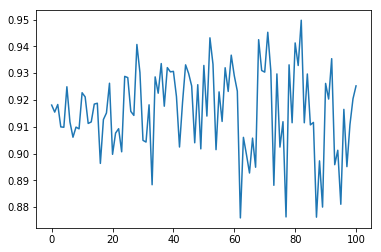

In [116]:
plt.plot(topdata)

In [5]:
# iptrack - interpolate track
#
# SYNTAX
# p=iptrack(filename)
#
# INPUT
# filename: data file containing exported tracking data on the standard
# Tracker export format
#
# mass_A
# t	x	y
# 0.0	-1.0686477620876644	42.80071293284619
# 0.04	-0.714777136706708	42.62727536827738
# ...
#
# OUTPUT
# p=iptrack(filename) returns the coefficients of a polynomial of degree 15
# that is the least square fit to the data y(x). Coefficients are given in
# descending powers.

import numpy as np

def iptrack(filename):
	data=np.loadtxt(filename,skiprows=2)
	return np.polyfit(data[:,1],data[:,2],15)

In [6]:
# trvalues - track values
#
# SYNTAX
# [y,dydx,d2ydx2,alpha,R]=trvalues(p,x)
#
# INPUT
# p: the n+1 coefficients of a polynomial of degree n, given in descending
# order. (For instance the output from p=iptrack(filename).)
# x: ordinate value at which the polynomial is evaluated.
#
# OUTPUT
# [y,dydx,d2ydx2,alpha,R]=trvalues(p,x) returns the value y of the
# polynomial at x, the derivative dydx and the second derivative d2ydx2 in
# that point, as well as the slope alpha(x) and the radius of the
# osculating circle. 
# The slope angle alpha is positive for a curve with a negative derivative. 
# The sign of the radius of the osculating circle is the same as that of 
# the second derivative.

import numpy as np

def trvalues(p,x):
	y=np.polyval(p,x)
	dp=np.polyder(p)
	dydx=np.polyval(dp,x)
	ddp=np.polyder(dp)
	d2ydx2=np.polyval(ddp,x)
	alpha=np.arctan(-dydx)
	R=(1.0+dydx**2)**1.5/d2ydx2
	return [y,dydx,d2ydx2,alpha,R]

In [67]:
polyarr = iptrack("01_vid1.txt")

In [96]:
testarr = trvalues(polyarr, [i/100 for i in range(-10, 110)])

0.19253281672945527

In [62]:
yrange = testarr[0]
xrange = [i/100 for i in range(-10, 110)]

In [65]:
trvalues(polyarr, [i/100 for i in range(-10, 110)])[1]

array([-1.31537442, -1.29761678, -1.26868115, -1.23424079, -1.19829353,
       -1.16346707, -1.13130169, -1.1025046 , -1.07717301, -1.05498459,
       -1.03535574, -1.0175691 , -1.00087256, -0.98455262, -0.96798515,
       -0.95066697, -0.93223131, -0.91245049, -0.89122876, -0.8685878 ,
       -0.84464759, -0.81960451, -0.79370851, -0.76724076, -0.740493  ,
       -0.71374918, -0.68727028, -0.66128231, -0.63596783, -0.61146084,
       -0.58784476, -0.56515339, -0.54337416, -0.5224535 , -0.50230364,
       -0.48281043, -0.4638417 , -0.44525577, -0.42690949, -0.40866585,
       -0.3904004 , -0.37200675, -0.35340054, -0.3345222 , -0.31533817,
       -0.29584087, -0.27604728, -0.25599654, -0.23574644, -0.21536938,
       -0.19494762, -0.17456844, -0.15431915, -0.13428237, -0.11453169,
       -0.09512794, -0.07611619, -0.05752364, -0.03935844, -0.02160951,
       -0.0042473 ,  0.01277449,  0.02951639,  0.04604987,  0.0624536 ,
        0.07880922,  0.09519703,  0.11169173,  0.12835835,  0.14

In [72]:
import matplotlib.pyplot as plt
import math

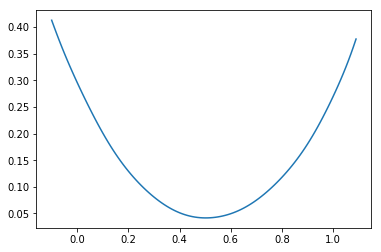

In [64]:
plt.plot(xrange,yrange)

Ser bra ut

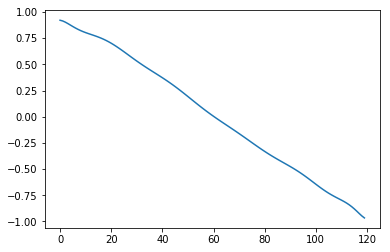

In [89]:
trackvalues = trvalues(polyarr, [i/100 for i in range(-10, 110)])
trackvalues

#[y,dydx,d2ydx2,alpha,R]

xrange = [i/100 for i in range(-10, 110)]
plt.plot(trackvalues[3])

trvalues(polyarr, x_old)[3]

In [126]:
N = 240000  # number of steps
h = 0.00001  # step size

# initial values
t_0 = 0
x_0 = 0
v_0 = 0
a_0 = 0
f_0 = 0
n_0 = 0
y_0 = 0.3


t = np.zeros(N+1)
x = np.zeros(N+1)
y = np.zeros(N+1)
v = np.zeros(N+1)
a = np.zeros(N+1)
f = np.zeros(N+1)
n = np.zeros(N+1)

t[0] = t_0
x[0] = x_0
y[0] = y_0
v[0] = v_0
a[0] = a_0
f[0] = f_0
n[0] = n_0

t_old = t_0
x_old = x_0
y_old = y_0
v_old = v_0
a_old = a_0
f_old = f_0
n_old = n_0

m = 0.0304
r = 0.01
I_0 = (2/5)*m*r*r
g = 9.81

for n in range(N):
    alp = trvalues(polyarr, x_old)[3]
    
    v_new = v_old + h*(g*(math.sin(alp)))/(1+(2/5))
    x_new = x_old + h*(v_old*math.cos(alp)) # Euler's method
    a_new = (g*math.sin(alp))/(1+2/5)
    f_new = m*g*math.sin(alp) - m*a_old    #friksjon
    n_new = (m*v_old*v_old)/trvalues(polyarr, x_old)[4] + m*g*math.cos(alp)    #normalkraft
    
    t[n+1] = t_old+h
    x[n+1] = x_new
    y[n] = trvalues(polyarr, x_old)[0]
    v[n+1] = v_new
    a[n+1] = a_new
    
    t_old = t_old+h
    x_old = x_new
    v_old = v_new
    a_old = a_new

print(r'x_N = %f' % x_old)


x_N = 0.232717


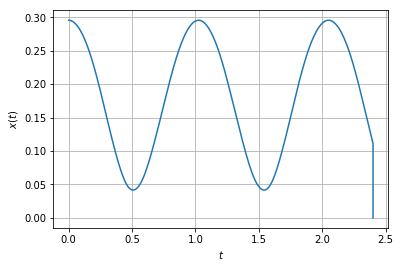

In [127]:

# Plot x(t)
plt.figure()
plt.plot(t,y)
plt.ylabel(r'$x(t)$')
plt.xlabel(r'$t$')
plt.grid()
plt.show()

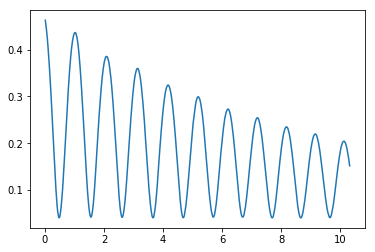

In [148]:
with open('01_vid1.txt','r') as f:
    l = 0
    ylist = []
    xlist = []
    tlist = [e/100 for e in range(1,1033)]
    for line in f:
        if (l < 2):
            l += 1
            continue
        for i, num in enumerate(line.split()):
            if ((i+1)%3==0):
                ylist.append(float(num))
            if ((i-1)%3==0):
                xlist.append(float(num))
        l += 1
    plt.plot(tlist,ylist)
